# Finding out the colors that make up the Image

## GRIP August 2021 

This notebook outlines the code and a small explanation behind the process of finding out the component colors of an image using the KMeans clustering and OpenCV

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [6]:
image = cv2.imread('sample_img.jpg')
print("The type of this input is {}".format(type(image)))


The type of this input is <class 'numpy.ndarray'>


*Sample Image before Conversion into RGB Format*

Shape: (2322, 4128, 3)


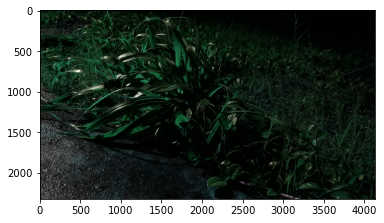

In [8]:
print("Shape: {}".format(image.shape))
plt.imshow(image)

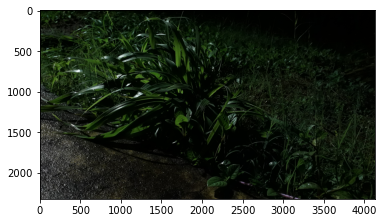

In [9]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [10]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# Explanation for all the steps made till now

After importing all the required libraries and then checking that the image is being read, I defined a function that gave me the Hex values of colors of the image

## KMeans using process and what it is:

* KMeans is an unsupervised clustering algorithm 
* It expects only flattened arrays as its inputs

In [11]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

*The above block is a function that reads and then converts the opencv format BGR image to RGB*

In [16]:
def get_color(image, no_of_req_colors, chart_status):
    
    mod_img = cv2.resize(image, (600,400), interpolation = cv2.INTER_AREA)
    mod_img = mod_img.reshape(mod_img.shape[0]*mod_img.shape[1], 3)
    
    clf = KMeans(n_clusters = no_of_req_colors)
    labels = clf.fit_predict(mod_img)
    
    counts = Counter(labels)
    
    counts = dict(sorted(counts.items()))
    # this sorts to ensure correct color percentage
    
    center_colors = clf.cluster_centers_
    # Now we order the colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    # we get the hex values of colors
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    
    # now we check whether the user wants to show a pie chart
    
    if (chart_status):
        plt.figure(figsize = (8,6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([1.76429998, 5.79027362, 0.94373877]),
 array([61.1043617 , 69.98691489, 58.3312766 ]),
 array([23.8456667 , 34.5217413 , 18.53889498]),
 array([159.33911159, 174.25352113, 168.28602384]),
 array([56.06199315, 88.5840692 , 30.30455938]),
 array([38.44299661, 52.05596922, 31.61640606]),
 array([11.78677659, 20.19881812,  8.14087366]),
 array([ 95.02430556, 105.90873016,  93.7750496 ])]

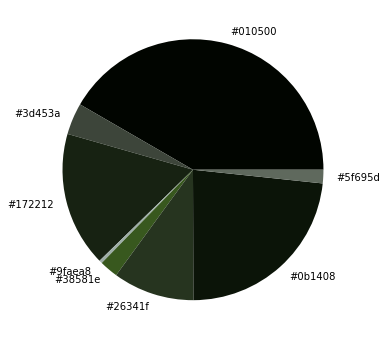

In [17]:
get_color(get_image('sample_img.jpg'), 8, True)